Data loaded and Running ICEEMDAN.
ICEEMDAN finished, taking 26.830s


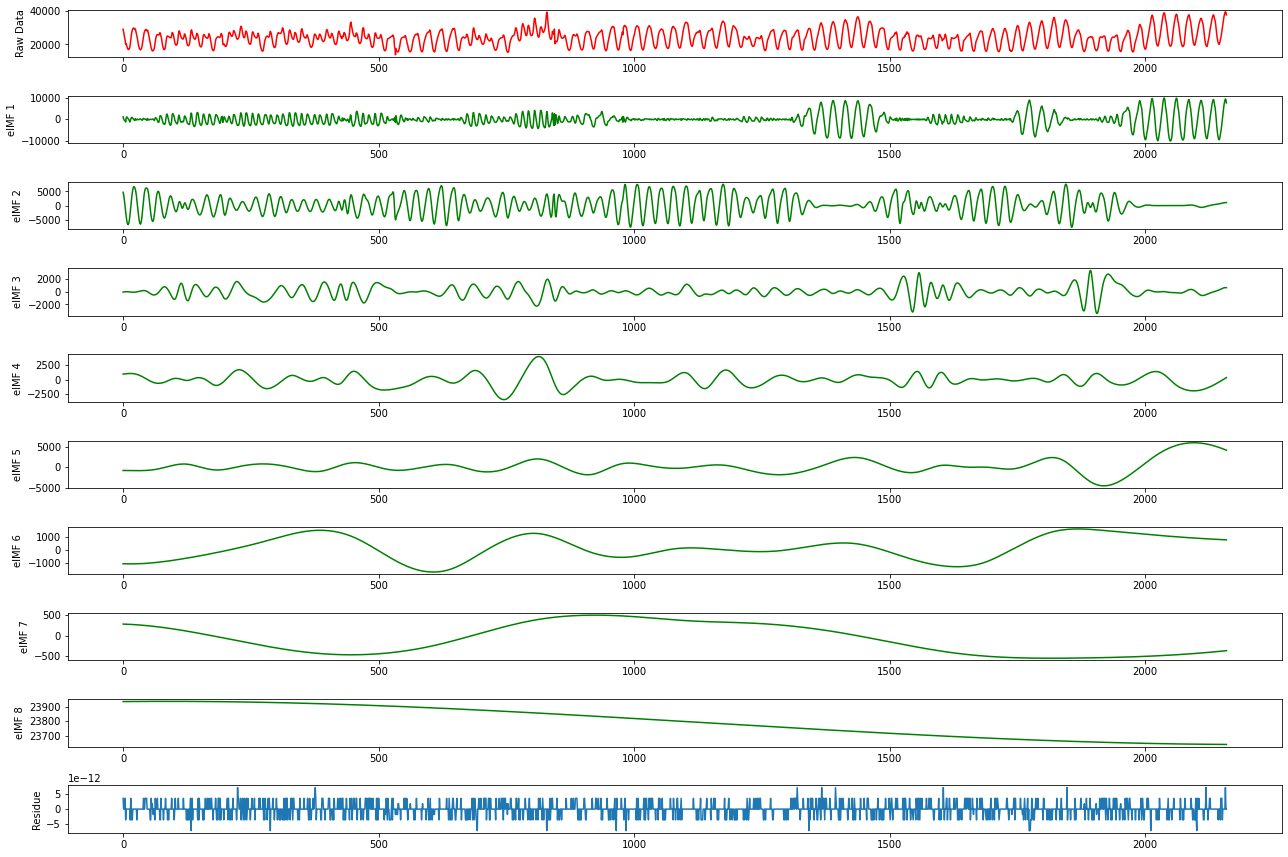

<Figure size 432x288 with 0 Axes>

In [7]:
# pip install numpy
# pip install pandas
# pip install EMD-signal

import os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PyEMD import CEEMDAN

class run_ceemdan():

    def __init__(self, file_path):

        self.data_df = self.load_data(file_path)

    def load_data(self, file_path):

        file_type = file_path.split('.')[-1]
        if file_type == 'xlsx':
            data_df = pd.read_excel(file_path)
        elif file_type == 'csv':
            data_df = pd.read_csv(file_path, encoding='utf_8_sig')
        else:
            raise ValueError("File type .{} unsupported!".format(file_type))

        return data_df

    def run(self):
        # load data
        data_np = self.data_df['负荷数据'].values

        # run iceemdan algorithm
        print("Data loaded and Running ICEEMDAN.")
        start_time = time.time()
        iceemdan = CEEMDAN()
        iceemdan.extrema_detection = "parabol" # simple or parabol, Method used to finding extrema.
        iceemdan.ceemdan(data_np)
        IMFs, residue = iceemdan.get_imfs_and_residue()
        print("ICEEMDAN finished, taking {:>.3f}s".format(time.time() - start_time))

        # save outputs
        num_of_IMFs = IMFs.shape[0]

        new_df = self.data_df.copy(deep=True)
        for ids in range(num_of_IMFs):
            new_df['eIMF {}'.format(ids + 1)] = IMFs[ids]
        new_df['residue'] = residue
        new_df.to_excel("{}\output.xlsx".format(os.getcwd()), encoding='utf_8_sig')

        # draw figures
        plt.figure(figsize=(18, 12))
        plt.subplot(num_of_IMFs + 2, 1, 1)

        plt.plot(self.data_df['负荷数据'], 'r')
        plt.ylabel("Raw Data")

        plt.subplot(num_of_IMFs + 2, 1, num_of_IMFs + 2)
        plt.plot(self.data_df.index, residue)
        plt.ylabel('Residue')

        for ids in range(num_of_IMFs):
            plt.subplot(num_of_IMFs + 2, 1, ids + 2)
            plt.plot(self.data_df.index, IMFs[ids], 'g')
            plt.ylabel("eIMF {}".format(ids + 1))
            plt.locator_params(axis='y', nbins=4)

        plt.tight_layout()
        plt.show()
        plt.savefig("{}\\final_results.png".format(os.getcwd()))


if __name__ == "__main__":
    # Parameters
    FILE_PATH = "data/第一季度.xlsx"

    # Run main code
    clf = run_ceemdan(file_path=FILE_PATH)
    clf.run()